In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

Text(0, 0.5, '$x_{2}$')

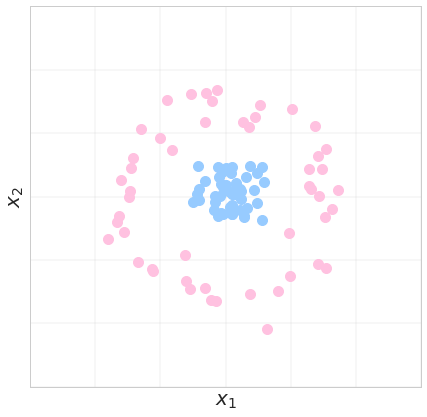

In [2]:
# generate circular distributed data
np.random.seed(0)

# create feature vector x
x = np.random.normal(scale=0.5, size=(100,3))

theta = np.arange(0, 2*np.pi, 0.127)
x[int(x.shape[0]/2):,0] += 3 * np.cos(theta)
x[int(x.shape[0]/2):,1] += 3 * np.sin(theta) 

x[:,2] = x[:,0]**2 + x[:,1]**2

# create label y
y = np.ones(100) * -1
y[50:] *= -1


# create matplotlib figure and axes
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1, figsize=(7, 7))

# scatter plotting the given data
plt.plot(x[:int(x.shape[0]/2),0],x[:int(x.shape[0]/2),1], color='#97cbff', lw=0, marker='o', markersize=10)
plt.plot(x[int(x.shape[0]/2):,0],x[int(x.shape[0]/2):,1], color='#ffc1e0', lw=0, marker='o', markersize=10)
# basic formatting for the axes
plt.grid(True, linewidth=0.3)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax.set_ylim(-6, 6)
ax.set_xlim(-6, 6)

ax.set_xlabel('$x_{1}$', fontsize=20)
ax.set_ylabel('$x_{2}$', fontsize=20) 

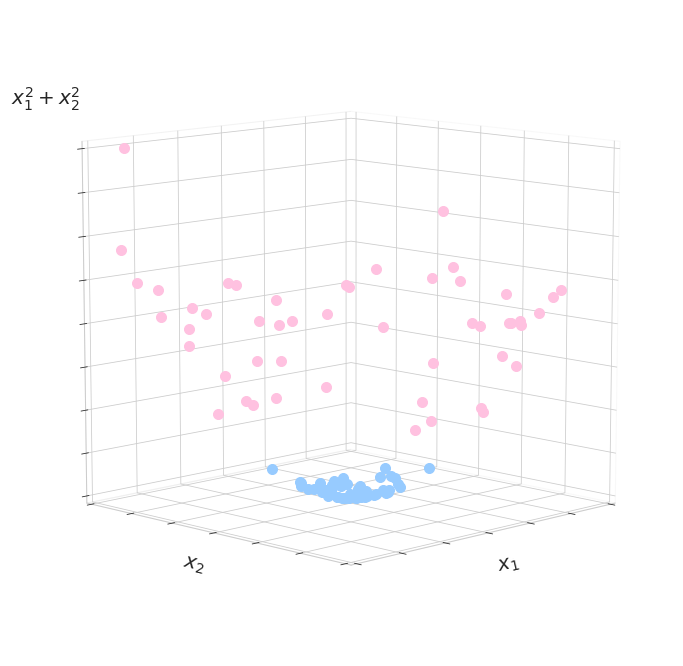

In [3]:
# create matplotlib figure and axes
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
# scatter plotting the given data
plt.plot(x[:int(x.shape[0]/2),0],x[:int(x.shape[0]/2),1], x[:int(x.shape[0]/2),2], color='#97cbff', lw=0, marker='o', markersize=10)
plt.plot(x[int(x.shape[0]/2):,0],x[int(x.shape[0]/2):,1], x[int(x.shape[0]/2):,2], color='#ffc1e0', lw=0, marker='o', markersize=10)
# basic formatting for the axes
plt.grid(True, linewidth=0.3)

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_zticklabels(), visible=False)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(0, 20)

ax.set_xlabel('$x_{1}$', fontsize=20)
ax.set_ylabel('$x_{2}$', fontsize=20) 
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('\n' + '${{x}_{1}^2}+{{x}_{2}^2}$', linespacing=-30, fontsize=20)

ax.view_init(10, 45)

In [4]:
def RBF_perceptron_single_step_update(
        alpha,
        alpha_matrix,
        feature_vector,
        feature_matrix,
        label,
        labels,
        gamma):
    """
    Updates alpha on a single step of the perceptron algorithm.

    Arguments:
        alpha - A scalar to track the number of mistakes
        alpha_matrix - A numpy matrix describing the number of mistakes of the given data
        feature_vector - A numpy array describing a single data point.
        feature_matrix - A numpy matrix describing the given data.
        label - The correct classification of the feature vector.
        labels - The correct classification of the feature matrix.
        gamma - The RBF hyperparameter.

    Returns: scalar alpha. 
    """
    tiled_feature_vector = np.tile(feature_vector, (feature_matrix.shape[0], 1))
    if label*((alpha_matrix
                 *labels
                   *np.exp(-gamma*np.linalg.norm(feature_matrix - tiled_feature_vector, axis=1, keepdims=True)**2)).sum()) <= 0:
        alpha += 1
    return alpha

In [5]:
def RBF_perceptron(feature_matrix, labels, T=2, gamma=0.3):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set.

    Arguments:
        feature_matrix - A numpy matrix describing the given data.
        labels - The correct classification of the feature vector.
        T - An integer indicating how many times the perceptron iterates through the entire feature matrix.
        gamma - The RBF hyperparameter.

    Returns: alpha matrix.
    """
    # initializing alpha for the RBF perceptron algorithms
    alpha_matrix = np.zeros((feature_matrix.shape[0], 1))
    
    # updating perceptrons
    for t in range(T):
        for i in range(feature_matrix.shape[0]):            
            alpha_matrix[i] = RBF_perceptron_single_step_update(
                                                                    alpha_matrix[i],
                                                                    alpha_matrix,
                                                                    feature_matrix[i],
                                                                    feature_matrix,
                                                                    labels[i],
                                                                    labels,
                                                                    gamma
                                                                ) 

            if (i+1) % 5 == 0:
                draw_contour_plot(alpha_matrix, gamma, t+1, i+1)
    return alpha_matrix

In [6]:
def draw_contour_plot(alpha_matrix, gamma, epoch, iteration):           
    # create matplotlib figure and axes
        plt.style.use('seaborn-whitegrid')
        plt.rcParams['contour.negative_linestyle'] = 'solid'
        fig, ax = plt.subplots(1, figsize=(7, 7))

        # scatter plotting the given data
        plt.plot(x[:int(x.shape[0]/2),0], x[:int(x.shape[0]/2),1], color='#97cbff', lw=0, marker='o', markersize=12)
        plt.plot(x[int(x.shape[0]/2):,0], x[int(x.shape[0]/2):,1], color='#ffc1e0', lw=0, marker='o', markersize=12)

        # draw classification boundary line
        n_x = 0.25
        n_y = 0.25
        x1 = np.arange(-6.0, 6.0, n_x)
        x2 = np.arange(-6.0, 6.0, n_y)
        xx1, xx2 = np.meshgrid(x1, x2)
        
        f = np.zeros(xx1.shape)
        for i in range(xx1.shape[0]):
            for j in range(xx1.shape[1]):
                f[i,j] = (
                            (
                                alpha_matrix                
                                *y
                                *np.exp(
                                    -gamma*np.linalg.norm(x - np.tile(np.array([xx1[i,j],xx2[i,j]]),(x.shape[0],1)), axis=1, keepdims=True)**2) 
                            ).sum()
                         ) 

        cs = ax.contour(x1, x2, f, 0, linewidths=4,colors='k')
        ax.clabel(cs, inline=1, fontsize=15, fmt='%1.1f', manual=[(1,1)])

        # display epoches on the plot
        text = plt.text(2, 5, f'$epoch:{epoch}$', fontsize=15)
        text = plt.text(2, 4, f'$iteration:{iteration}$', fontsize=15)

        # basic formatting for the axes
        plt.grid(True, linewidth=0.3)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)

        ax.set_ylim(-6, 6)
        ax.set_xlim(-6, 6)

        ax.set_xlabel('$x_{1}$', fontsize=20)
        ax.set_ylabel('$x_{2}$', fontsize=20) 

        ax.set_title('$Classification \ by \ RBK \ Perceptron$', fontsize=20)

        # draw the figure
        plt.show()
        plt.close(fig)

In [7]:
# generate circular distributed data
np.random.seed(0)

# create feature vector x
x = np.random.normal(scale=0.5, size=(100,2))

theta = np.arange(0, 2*np.pi, 0.127)
x[int(x.shape[0]/2):,0] += 3 * np.cos(theta)
x[int(x.shape[0]/2):,1] += 3 * np.sin(theta) 

# create label y
y = np.ones((100,1))
y[50:] *= -1

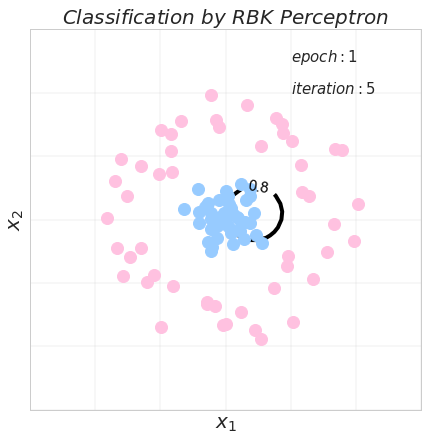

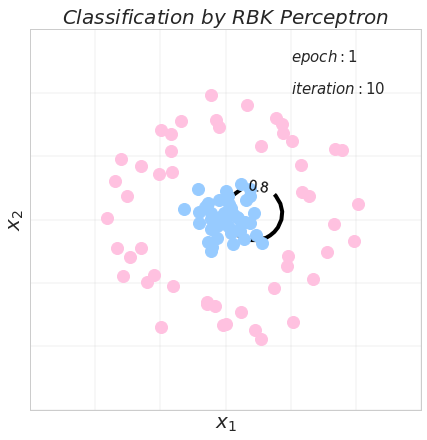

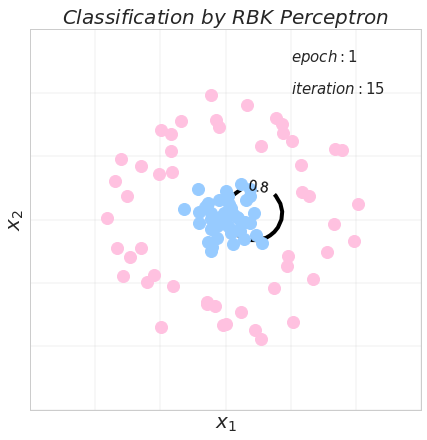

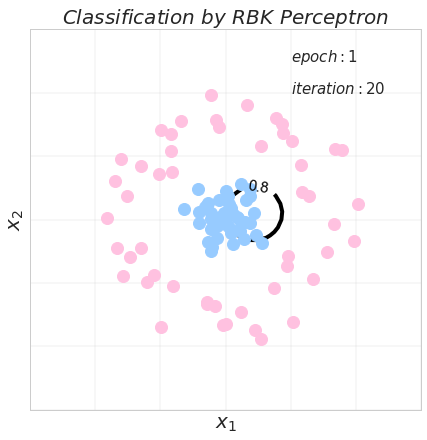

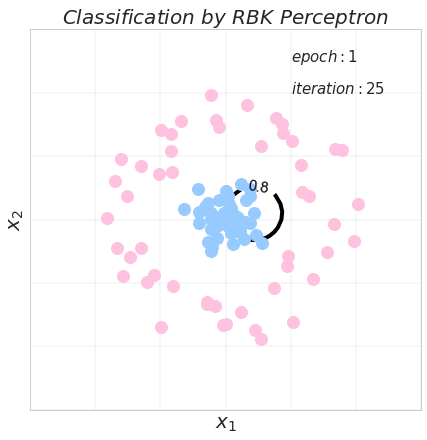

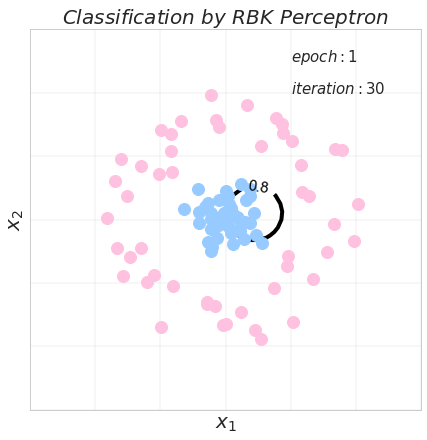

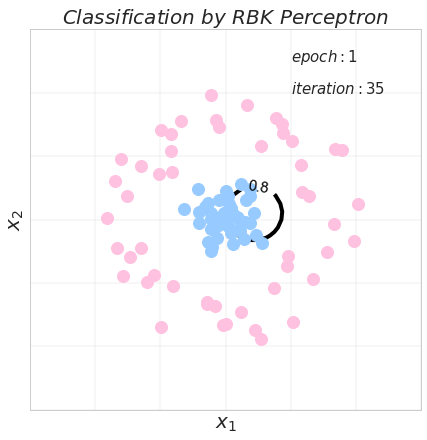

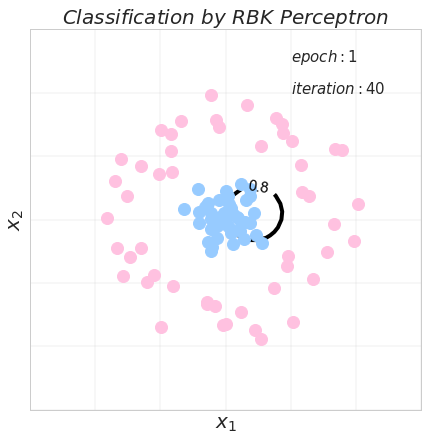

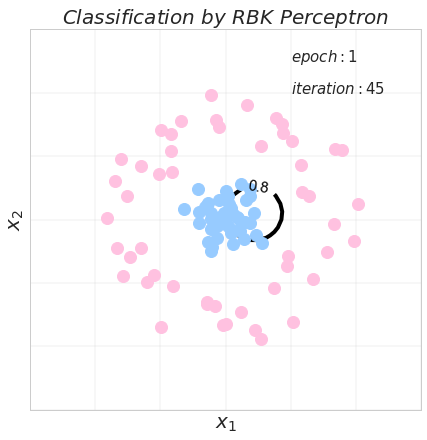

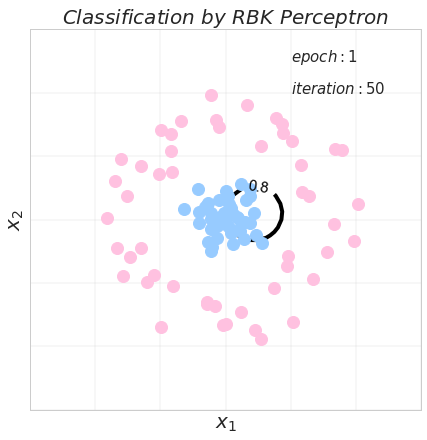

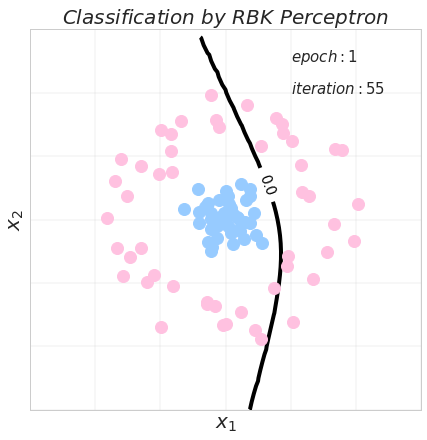

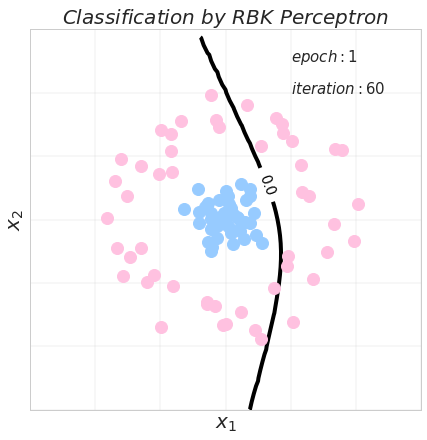

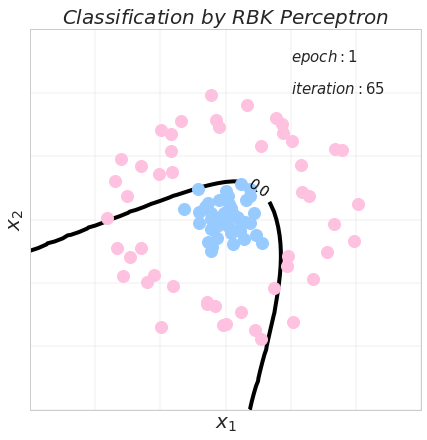

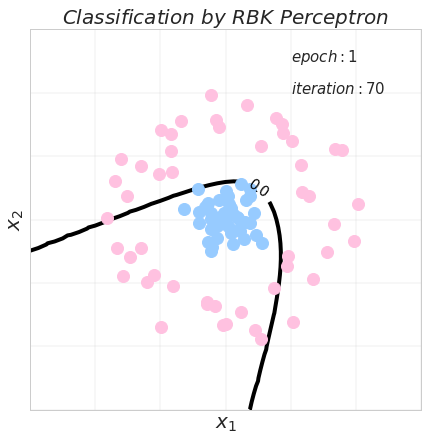

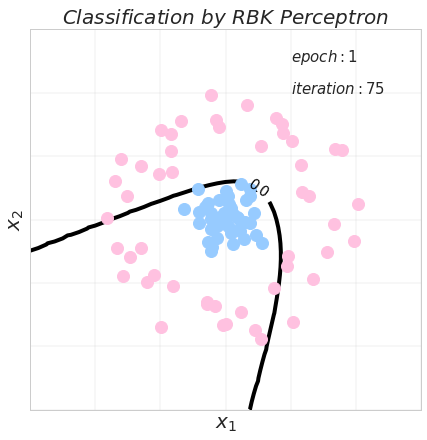

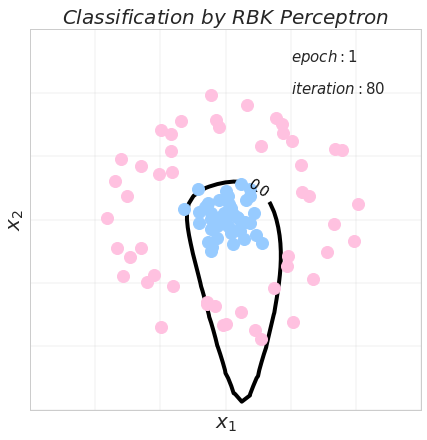

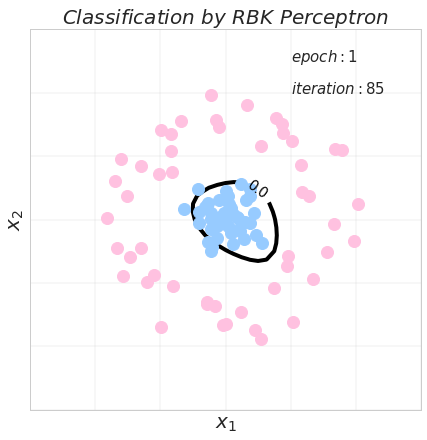

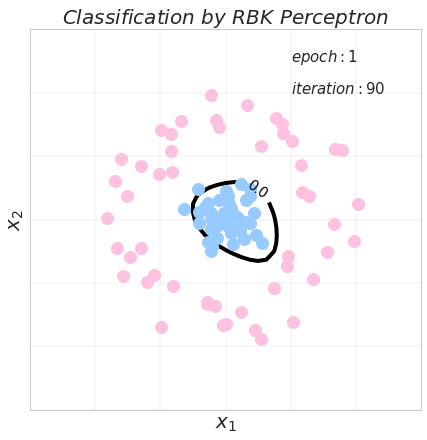

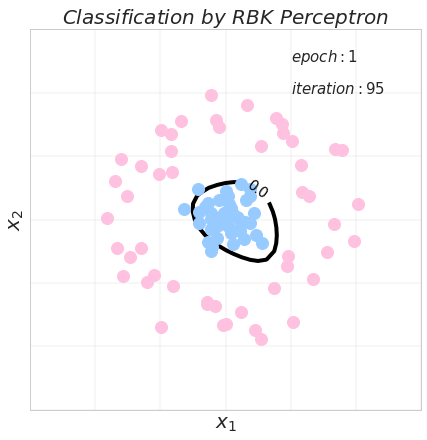

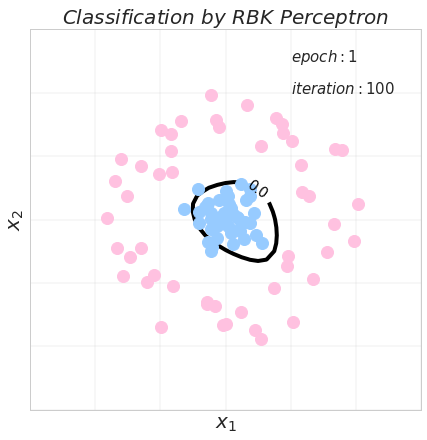

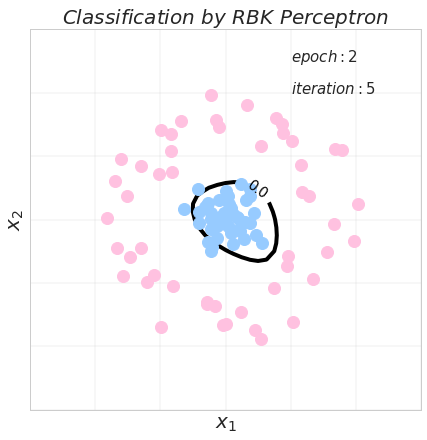

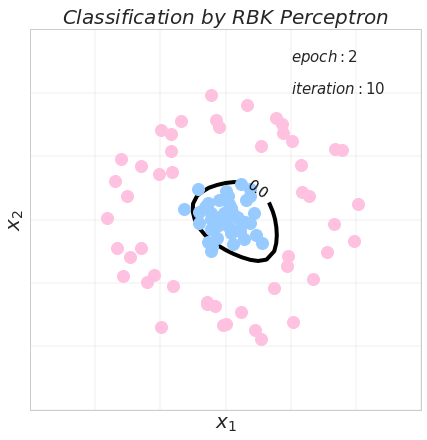

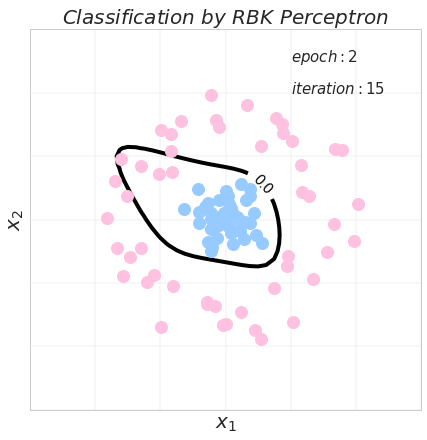

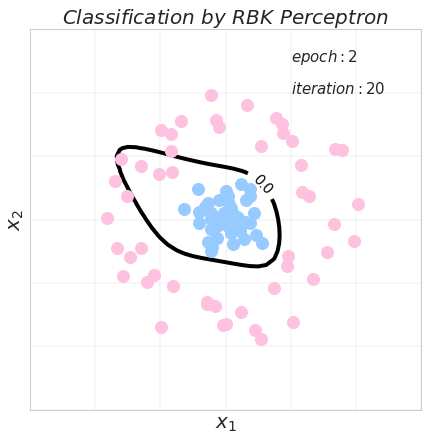

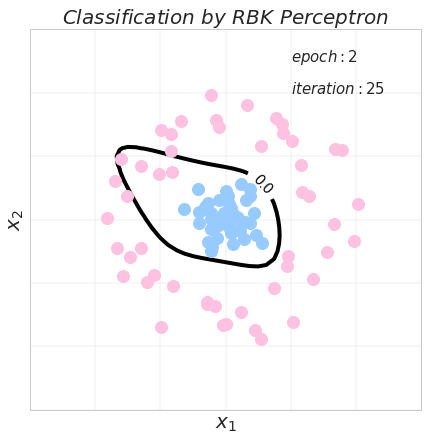

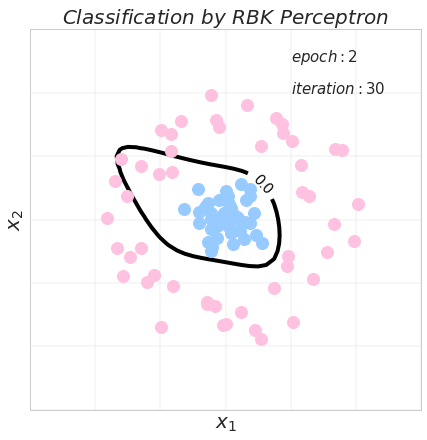

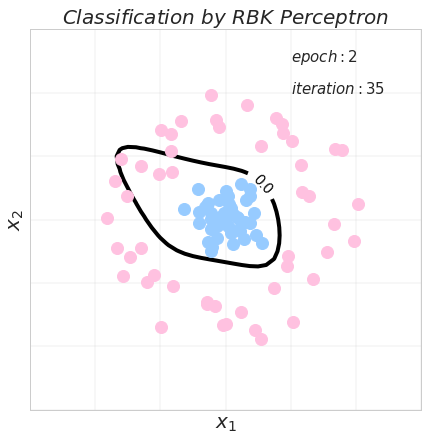

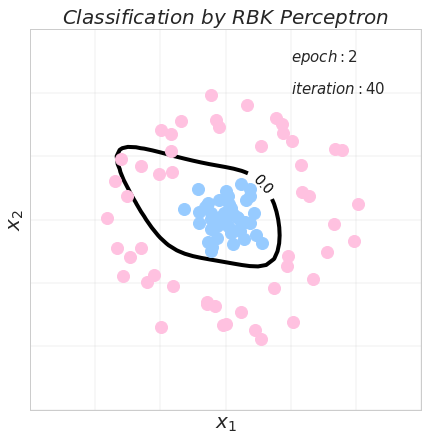

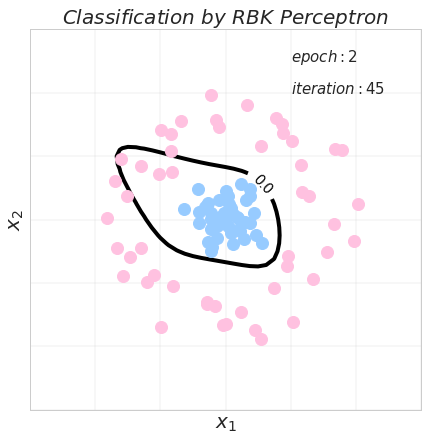

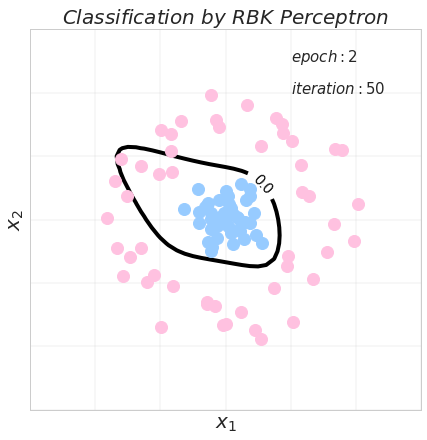

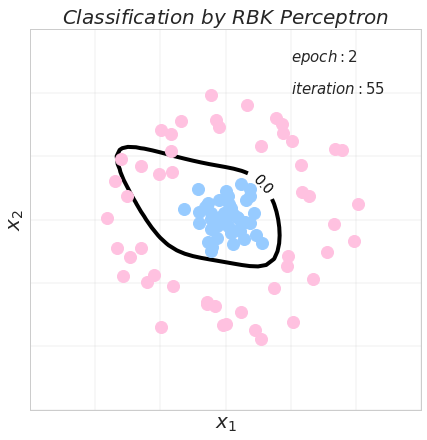

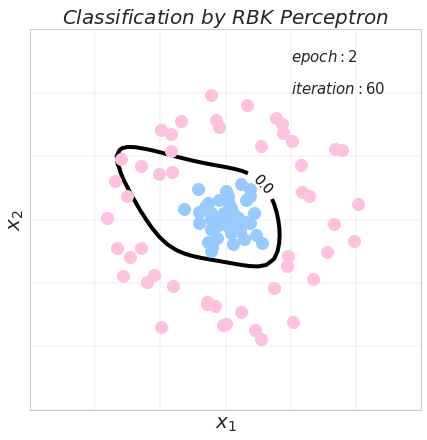

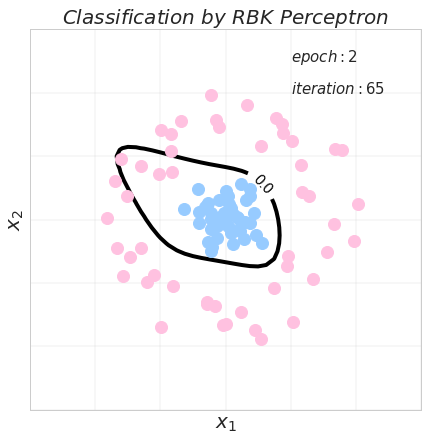

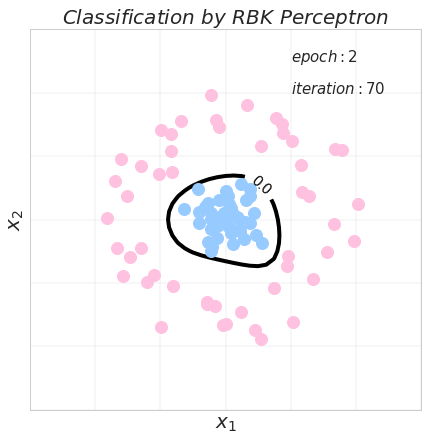

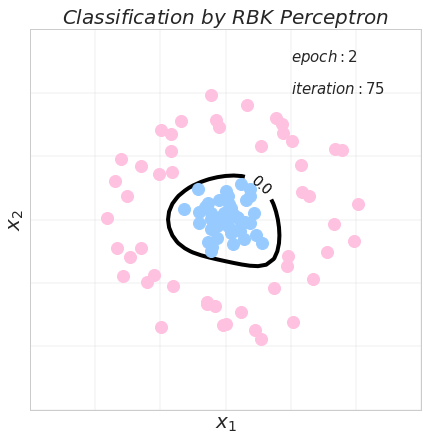

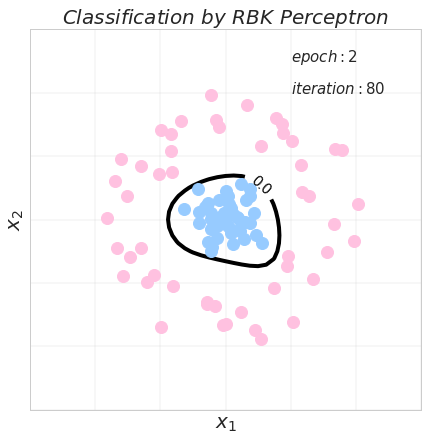

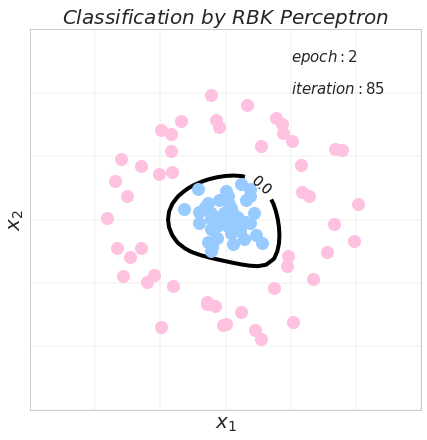

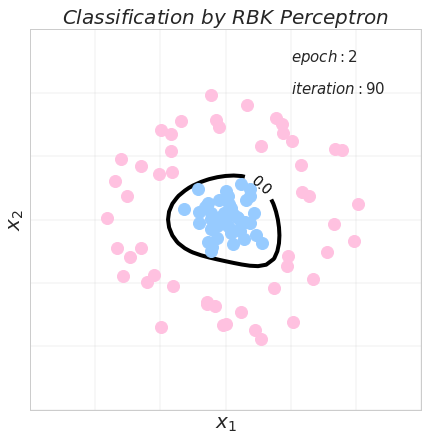

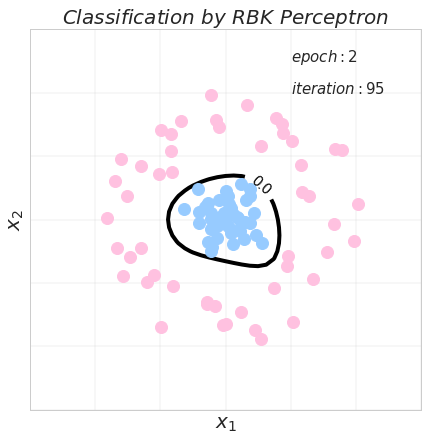

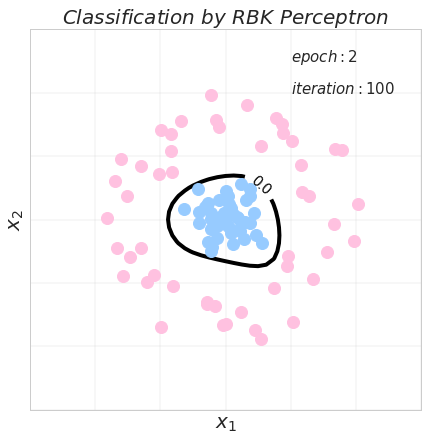

In [8]:
def main():
    RBF_perceptron(x, y) 

if __name__ == '__main__':
    main()